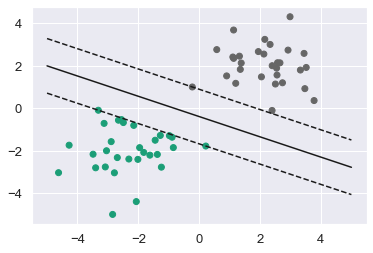

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X = np.r_[np.random.randn(30, 2) - [2, 2], np.random.randn(30, 2) + [2, 2]]
Y = [0] * 30 + [1] * 30

#берем линейный классификатор, тк данные могут быть разделены линией
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

#получаем рязделяющую линию
w = clf.coef_[0] #нормаль к прямой
k = -w[0] / w[1] #-A/B
x_line = np.linspace(-5, 5)#координаты x
y_line = k * x_line - (clf.intercept_[0]) / w[1]#вывод из общего уравнения прямой: y = -(A/B)*x - C/B

#строим параллельные линии к разделяющей, образующие максимально возможный отступ от нее
b = clf.support_vectors_[0]
y_down = k * (x_line -b[0])+ b[1] #добавляем смещение по координатам опорных векторов
b = clf.support_vectors_[-1]
y_up = k * (x_line -b[0])+ b[1]

#вывод линий и точек
plt.plot(x_line, y_line, 'k-')
plt.plot(x_line, y_down, 'k--')
plt.plot(x_line, y_up, 'k--')

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
plt.show()